<a href="https://colab.research.google.com/github/angeloBuso/algoritmos_ML/blob/main/%5BTemplate_Classificador_Buso%5DPrevisao_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="header title" width="100%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/Imagem2.jpg?raw=true">

<img alt = "qr-code" align = "right" width="10%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/angelobuso.png?raw=true">

## **1. Compreensão Problema de Negócio** *(business understanding)*

A **retenção de clientes** é uma das questões mais importantes em que as companhias devem lidar. Prevenção da evasão de clientes (*customer churn prevention*) faz parte das estratégias do gerenciamento do relacionamento do cliente (*CRM*). Grandes empresas implementam modelos de previsão de *churn* para serem capazes de detectar possibilidade/probabilidade de evasões, antes mesmo da efetiva saída desse cliente.

<p align=center>
<img src="https://marketup.com/wp-content/uploads/2021/10/vazou-1.jpg" width="100%"></p>

***Churn Rate*** ou apenas ***Churn*** é uma métrica de extrema importância para os tomadores de decisões. Com ela visualiza a quantidade de clientes que a empresa perdeu (a), em comparação com a quantidade total de clientes (b), em uma espaço de tempo (c), ou seja, ao longo de (c) períodos a taxa de evasão se dá por (a)/(b). Portanto, quanto menor essa proporção melhor para a empresa. Sua análise ao longo do tempo pode revelar problemas que deverão ser solucinados.

Associando esse conceito de *churn* juntamento com **(i) ciência computacional, (ii) matemática, (iii) estatística e (iv) um bom histórico de dados com clientes** que evadiram-se e os que ainda estão na empresa, podemos **prever**/identificar potenciais cancelamentos, e o que é melhor de forma antecipada, o que permitirá promover ações direcionadas para tentar reter tais clientes.

O que se justifica o uso desses modelos que a propósito, usam **aprendizado de máquina**, é o fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, o que queremos é **menores custos** e **maiores receitas**!!

Nesse contexto usaremos Inteligência Artificial para tal detecção. Usando (a) uma base histórica, (b) um algoritmo de *machine learning* e (c) as compreensão das técnicas e as boas práticas da Ciência de Dados, construiremos uma ferramenta que seja capaz de prever a probabilidade de uma pessoa cancelar seus produtos junto a uma empresa.

Para a tarefa, usaremos dados históricos de clientes de uma companhia telefônica.

In [1]:
# !pip install pandas-profiling==2.7.1 -q
# !pip install pandas==1.2 -q
# !pip install scikit-plot -q
# !pip install imbalanced-learn -q

     |████████████████████████████████| 252 kB 33.8 MB/s 
     |████████████████████████████████| 675 kB 35.8 MB/s 
     |████████████████████████████████| 4.7 MB 51.9 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 812 kB 33.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 9.9 MB 10.5 MB/s 


In [1]:
# Análise exploratória
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pré Processar
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

# Algoritmos de aprendizagem
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Fit modelo
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

# Avaliação Modelo
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report, roc_auc_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import warnings
warnings.filterwarnings("ignore")
print("versão do Pandas Profiling é:", pp.__version__)
print("versão do Pandas é:", pd.__version__)

versão do Pandas Profiling é: 2.7.1
versão do Pandas é: 1.2.0


In [ ]:
# pip list

### **1.1 Dicionário dados**


#### Informações sobre os atributos: 

1. customerID        -> indicador ID do cliente na empresa
2. gender            -> gênero do cliente
3. SeniorCitizen     -> indicador da "melhor idade"
4. Partner           -> possui algum companheiro
5. Dependents        -> se possui algum dependente 
6. tenure            -> tempo de permanência na empresa
7. PhoneService      -> se possui serviço de telefone
8. MultipleLines     -> se possui multiplas linhas de telefone
9. InternetService   -> qual tipo de serviço de internet possui
10. OnlineSecurity   -> se possui serviço de antivirus
11. OnlineBackup     -> se possui serviço de backup online contratado
12. DeviceProtection -> se possui serviço de proteção contratado
13. TechSupport      -> se possui serviço de suporte contratado
14. StreamingTV      -> se possui serviço de streaming de TV contratado
15. StreamingMovies  -> se possui serviço de streaming de Filmes contratado
16. Contract         -> Tipo do contrato
17. PaperlessBilling -> se fatura impressa em casa
18. PaymentMethod    -> forma de pagamento
19. MonthlyCharges   -> gastos mensais
20. TotalCharges     -> gastos totais (mensal * tenure)
21. Churn            -> variável **alvo** se o cliente evadiu no final de seu contrato (YES) ou ainda está na empresa (NO)

## **2. Coleta Dados**

Como todo projeto de *machine learning* a matéria-prima são **dados**, utilizaremos uma coleção de informações catalogadas e disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#).

<p align=center>
<img src="https://img.freepik.com/free-vector/cloud-computing-technology-scheme-with-long-shadows_1284-42972.jpg?w=740" width="50%"></p>

Esses dados tratam um problema típico de companhias de telecomunicações. Incluem informações sobre:

Clientes que sairam da empresa no vencimento de seu contrato -> coluna `churn` nossa variável *target*. É o que queremos que o modelo de *ML* aprenda.

Serviços que cada cliente tinham contratados -> colunas `phone`,`multiple lines`, `internet`, `online security`, `online backup`, `device protection`, `tech support`, `streaming TV` e `streaming movies`.

Informações sobre a conta do cliente –> colunas `tenure`(famoso "*cliente desde*"), `contract`, `payment method`, `paperless billing`, `monthly charges`, e `total charges`.

Informações demográficas sobre os clientes –> colunas `gender`, `age range`, e se estes possuem `partners` (companheiros)  e `dependents`(dependentes).


**Dicas:**  
1. Observar as extensão do arquivo dataSet.
2. Verificar os acessos aos dataSet (LGPD).
3. "Timeframe" dos dados (desde quando tem-se os dados).
4. Valores Missing (será substituido por default ou outro valor - média, por exemplo).
5. Cabeçalho (header=T), caso False, irá indicar cabeçalho.
6. Dados possuem algum comentário.
7. Possui delimitador os dados.

### **2.1 Carga dados** 

**Dicas:**  

(i) Observar as extensão do arquivo dataSet;

(ii) Verificar os acessos aos dataSet;

(iii) "Timeframe" dos dados (desde quando tem-se os dados);

(iv) Valores Missing (será substituido por default ou outro valor - média, por exemplo);

(v) Cabeçalho (header=T), caso False, irá indicar cabeçalho;

(vi) Dados possuem algum comentário;

(vii) Possui delimitador os dados;

(viii) Até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel). Acima 3 dim NUMPY (nparray).

In [2]:
# DICA: i.<arquivo = ':/path'> ii.<colunas = ['col1', '...']> iii.<df = pd.read_csv(arquivo, names = colunas)>

path = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(path)
print('Os dados possuem {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))
df.head()

Os dados possuem 7043 linhas e 21 colunas


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **3. Análise Exploratória**


### 3.1 Visão Geral dataSet
Nesta estapa estamos interessados em entender melhor:
* Tipo Objeto que estamos trabalhando
* Tipos Dados
* Shape - Dimensionalidade
* Índices
* Descrição dos dados

In [3]:
def visaogeral(df, mensagem):
    print(f'{mensagem}:\n')
    print("Qtd Observações:", df.shape[0])
    print("\nQtd Atributos:", df.shape[1])
    print("\nAtributos:")
    print(df.columns.values)
    # print(df.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Unicos:")
    print(df.nunique())

In [4]:
visaogeral(df,'Visão Geral do dataSet')

Visão Geral do dataSet:

Qtd Observações: 7043

Qtd Atributos: 21

Atributos:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Qtd Valores missing: 0

Valores Unicos:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Das células acima já podemos ter uma **conciência situacional** dos dados que temos em mãos. O dataSet possui um pouco mais de **7 mil registros**, informações de clientes que saíram ou não da empresa no final de seu contrato.

A coluna `customerID`, pela quantidade de valores distintos e a nomenclatura *ID*, indica ser o identificador único que cada cliente possui dentro da empresa. Logo não tem nenhum valor preditivo ao modelo, excluiremos. 

Os valores únicos indicados em cada coluna mostra que temos informações do **tipo categórica**. Já nos dá sinais do uso de técnicas de *dummies*.

Nesse primeiro momento não possuímos valores ausentes. Possuir um dataSet sem dados *missing* é muito bom!! 😀😀😀😀😀😀 Mais será mesmo que podemos confiar que não temos *missing*???... pois é... ta aí uma boa pergunta que iremos descobrir ao explorar os dados.  

Qual tipo de dados é nosso dataSet?

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


**TRADE-OFF's da Ciência de Dados!**

Se o número de **linhas/observações** no seu arquivo for **muito grande**, o algoritmo pode levar **muito tempo** para ser **treinado**. Se o número de **registros for muito pequeno**, você pode não ter registros suficientes para treinar seu modelo (**underfitting**- decora ponto dos dados). 

Se você tiver **muitas colunas/atributos** em seu arquivo, o algoritmo pode apresentar problemas de performance devido a **alta dimensionalidade**.

A melhor solução vai depender de cada caso. Mas lembre-se: **treine** seu modelo em um subset do seu conjunto de dados maior **(70% treino)** e depois aplique o modelo a novos dados **(30% teste)** para verificar a performance. Uma boa prática é ter uma massa de dados para **validação durante o treinamento**.

Observando uma amostra inicial e uma amostra final do dataSet. 

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Relembrando o shape dos dados:

In [9]:
print('Os dados possuem {:.2f} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

Os dados possuem 7043.00 linhas e 21 colunas


DICA: **A informação deve representar o que está informando** 

verificar tipo dos dados é muito importante. Pode ser necessário converter strings em valores numéricos (*dummies*). Ou até, colunas com números inteiros representarem variáveis categóricas ou valores ordinários.

In [10]:
tipo = pd.DataFrame(df.dtypes, columns= ['Tipo_Var'])
tipo.columns.name = 'Var'
tipo

Var,Tipo_Var
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Verificamos que as informações estão sendo representadas, em sua maioria, por dados do tipo string `object`, ou seja, dados categóricos. Bem como a última variável, a de interesse, também neste formato `object`.

Nosso objetivo é realmente entender se esses formatos representam a **informação** que a *feature* precisa passar!

In [11]:
# checando índice (endereço de cada obs) e sua distribuição
df.index

RangeIndex(start=0, stop=7043, step=1)

In [12]:
# checando os nomes das colunas
df.columns[20]
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Resumo estatístico** das variáveis numéricas indicadas na carga dos dados.

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Obsevando o dataSet, a feature `TotalCharges` representa o total dos gastos desse ID [cliente]. Tal informação foi indicado na carga dos dados como `object`, ou seja, feature do tipo string.

De fato não representa a informação, pois se é a quantidade total de gastos, essa informação deveria ser do tipo `numérica`, logo teremos que, na fase de pré-processamento, realizar tal alteração.

In [14]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

## Automatizando insights
Como forma de ganhar **conciência situacional**, usando a bibliotca Pandas Profile para gerar um report automatizado, o qual obtemos uma visão geral dos dados.

Importante: caso esteja usando o Colab, a biblioteca Pandas Profile já é nativo do ambiente em nuven da Google, no entanto a versão atual, até o momento da contrução desse trabalho apresentava erro.

[Como solução, usaremos a versão 2.7.1 e ainda o versão 1.2 do pandas 1.2](https://stackoverflow.com/questions/68704002/importerror-cannot-import-name-abcindexclass-from-pandas-core-dtypes-generic)

 `!pip install pandas-profiling==2.7.1 e panda==1.2`

Importante ressaltar que o Pandas Profile **não substitui uma EDA completa**, essa é apenas mais uma ferramenta para nos ajudar nesta tarefa.

Lembre-se quanto mais dimensionado for seus dados, maior o processamento dele com essa ferramenta, se rodar com essa quantidade de atributos e observações demanda muito tempo seu processamento!!

In [15]:
report = pp.ProfileReport(df)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# exportar em formato html
report.to_file('relatorio_churn.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### 3.1.1 Verificando Missing

In [17]:
# df.isna().sum().sort_values(ascending= False)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# Percentual de valores ausentes por variável
pct_miss = 100*df.isnull().sum()/len(df)
pct_miss[(-pct_miss).argsort()]

customerID          0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
TotalCharges        0.0
OnlineBackup        0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
gender              0.0
OnlineSecurity      0.0
Churn               0.0
dtype: float64

In [19]:
df[['tenure','MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45
7041,4,74.40,306.6


Verificamos que os dados não possuem dados ausentes. DataSet's sem dados nulos, é "bom de mais pra ser verdade!" 😃😃😃😃😃 

Mas..... 😯😯😯😯 a feature `TotalCharges` deveria representar informações do tipo numérico, pois trata-se do total de gastos. Uma hipótese seria, na carga dos dados o interpretador considerou o tipo de dados `string` por conter dados nulos, os quais foram interpretados como *string* e toda *feature* herdou essa característica.

Usualmente, na fase de pré-processamento dos dados é onde alteramos tipos de variáveis. No entanto não existem procedimentos rígidos em **Ciências de Dados**, o que a torna uma ciência belíssima por sinal.

Iremos converter essa *feature* em numérica e verificar se rejeitamos ou falhamos em reijeitar essa nossa hipótese.

In [20]:
# df['TotalCharges'].astype('int')

Acima seria uma das formas mais simples de converter uma *feature* para numérico, usando uma função nativa, porém tomamos erro. 

Uma segunda abordagem seria usar uma função do `Pandas` que converta uma coluna para numérico, indicando um parâmetro se `erro` colocar `NaN` nesse registro.

In [21]:
# antes da mudança
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [22]:
# obtendo a localização da coluna que queremos alterar
totalCharges = df.columns.get_loc("TotalCharges")

# criando uma Series pandas
coluna_num = pd.to_numeric(df.iloc[:, totalCharges], errors = 'coerce')

# substituindo no dataSet
df.iloc[:, totalCharges] = pd.Series(coluna_num)

In [23]:
# depois da mudança
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Agora conseguimos ver um resumo estatísticos das variáveis numéricas

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [25]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nesse caso, 11 células estavam com "erro" que indicou como `string` toda a *feature*. Ao mudar esse comportamento identificamos de temos dados faltantes.

In [28]:
# Percentual de valores ausentes por variável
pct_miss = 100*df.isnull().sum()/len(df)
pct_miss[(-pct_miss).argsort()]

TotalCharges        0.156183
customerID          0.000000
MonthlyCharges      0.000000
PaymentMethod       0.000000
PaperlessBilling    0.000000
Contract            0.000000
StreamingMovies     0.000000
StreamingTV         0.000000
TechSupport         0.000000
DeviceProtection    0.000000
OnlineBackup        0.000000
InternetService     0.000000
MultipleLines       0.000000
PhoneService        0.000000
tenure              0.000000
Dependents          0.000000
Partner             0.000000
SeniorCitizen       0.000000
gender              0.000000
OnlineSecurity      0.000000
Churn               0.000000
dtype: float64

Em termos percentuais, temos menos que 1% de dados missing. 

#### 3.1.2 Var_Explanatória e Var_Target

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
X_churn = df.drop(columns= 'Churn', axis= 1)
y_churn = df.Churn

In [31]:
y_churn.shape

(7043,)

In [32]:
print('DataSet original com {} atributos e {} observações'.format(df.shape[1], df.shape[0]))
print('As variáveis independentes possuem {} atributos e {} observações'.format(X_churn.shape[1], X_churn.shape[0]))
print('A variável dependente possuem {} observações'.format(y_churn.shape))

DataSet original com 21 atributos e 7043 observações
As variáveis independentes possuem 20 atributos e 7043 observações
A variável dependente possuem (7043,) observações


####  3.1.3  Análise da Var_Target
A variável de interesse é o atributo `Churn` do nosso dataSet. É a *feature* que indica se o cliente `customerID` encerrou seu relacionamento com a empresa de telecomunicação `Yes` e aqueles que ainda são consumidores `No`. Separamos ela para o objeto y (item 3.1.2). As demais variáveis que chamamos de variáveis independentes as trataremos mais abaixo.

Focaremos agora na variável predita, variável **dependente**.

#####  3.1.3.1  Amplitude

In [33]:
y_churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [34]:
y_churn.unique()

array(['No', 'Yes'], dtype=object)

Observando os valores únicos da variável predita, confirmamos ser do tipo categórica e possuir 2 categorias:
* `No` =  não há **churn**, o cliente está na empresa ainda!!
* `Yes` = houve **churn**, o cliente evadiu-se no final de seu contrato.

Portanto estamos diante de um problema de **aprendizado supervisionado** do tipo **classificação**.

Nosso modelo preditor será um **classificador**.

#####  3.1.3.2  Balaceamento dados 

Em problemas de classificação pode ser necessário balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento.

In [35]:
y_churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
print("\nObserva-se que {:.4f}% do dataSet realizaram churn".format((df.groupby('Churn').size()[1] / df.shape[0])*100))
print("Enquanto que {:.4f}% dos dados não realizaram churn.\n".format((df.groupby('Churn').size()[0] / df.shape[0])*100))


Observa-se que 26.5370% do dataSet realizaram churn
Enquanto que 73.4630% dos dados não realizaram churn.



In [37]:
balData = pd.DataFrame(df.Churn.value_counts())
balData['% total'] = round(100*balData['Churn']/df.shape[0], 2)
balData

,Churn,% total
No,5174,73.46
Yes,1869,26.54


#####  3.1.3.3  Plots Var_Target

In [38]:
pct_class = round(df.Churn.value_counts() / df.shape[0], 2)*100
pct_class

No     73.0
Yes    27.0
Name: Churn, dtype: float64

In [39]:
%matplotlib inline
# seto algumas caracteristicas para os plots. Padornizar Plots
sns.set(style='darkgrid')
sns.set_palette("hls", 3)

Churn
No     5174
Yes    1869
dtype: int64


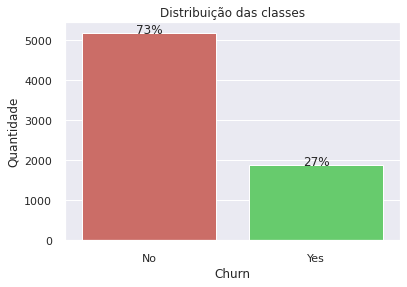

In [40]:
print(df.groupby(['Churn']).size())
churn_plot = sns.countplot(data=df, x='Churn', order=df.Churn.value_counts().index)
plt.title('Distribuição das classes')
plt.ylabel('Quantidade')
for p in churn_plot.patches:
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2.,
                    height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

####  3.1.4 Preditores Categóricos
Na exploração dos dados identificamos que os dados no dataSet são potencialmentes categóricos.

Realizaremos uma divisão no dataSet por tipo de variáveis no intuito de confeccionar plot's mais representativos, bem como identificar possíveis *viés* nestas *features* categóricas.

Preservaremos o dataSet, realizaremos uma cópia e exluiremos a *feature* `customerID`. Prosseguiremos com a construção dos plot's. 


In [41]:
df_graph = df.copy()
df_graph.drop('customerID', axis=1, inplace= True)
print("dados originais \t", df.shape)
print("dados para gráficos \t", df_graph.shape)

dados originais 	 (7043, 21)
dados para gráficos 	 (7043, 20)


In [42]:
# recupero uma lista de colunas do tipo categórica, retirando a coluna target
categoricas = [coluna for coluna in df_graph.select_dtypes(['object']).columns.tolist() if coluna != 'Churn']

#####  3.1.4.1 Plots dos Preditores Categóricos

Plotamos cada variável categórica em gráficos de barras (*bar chart*) para mostrar a frequência desses valores categórico e compreender suas relações com a variável target.

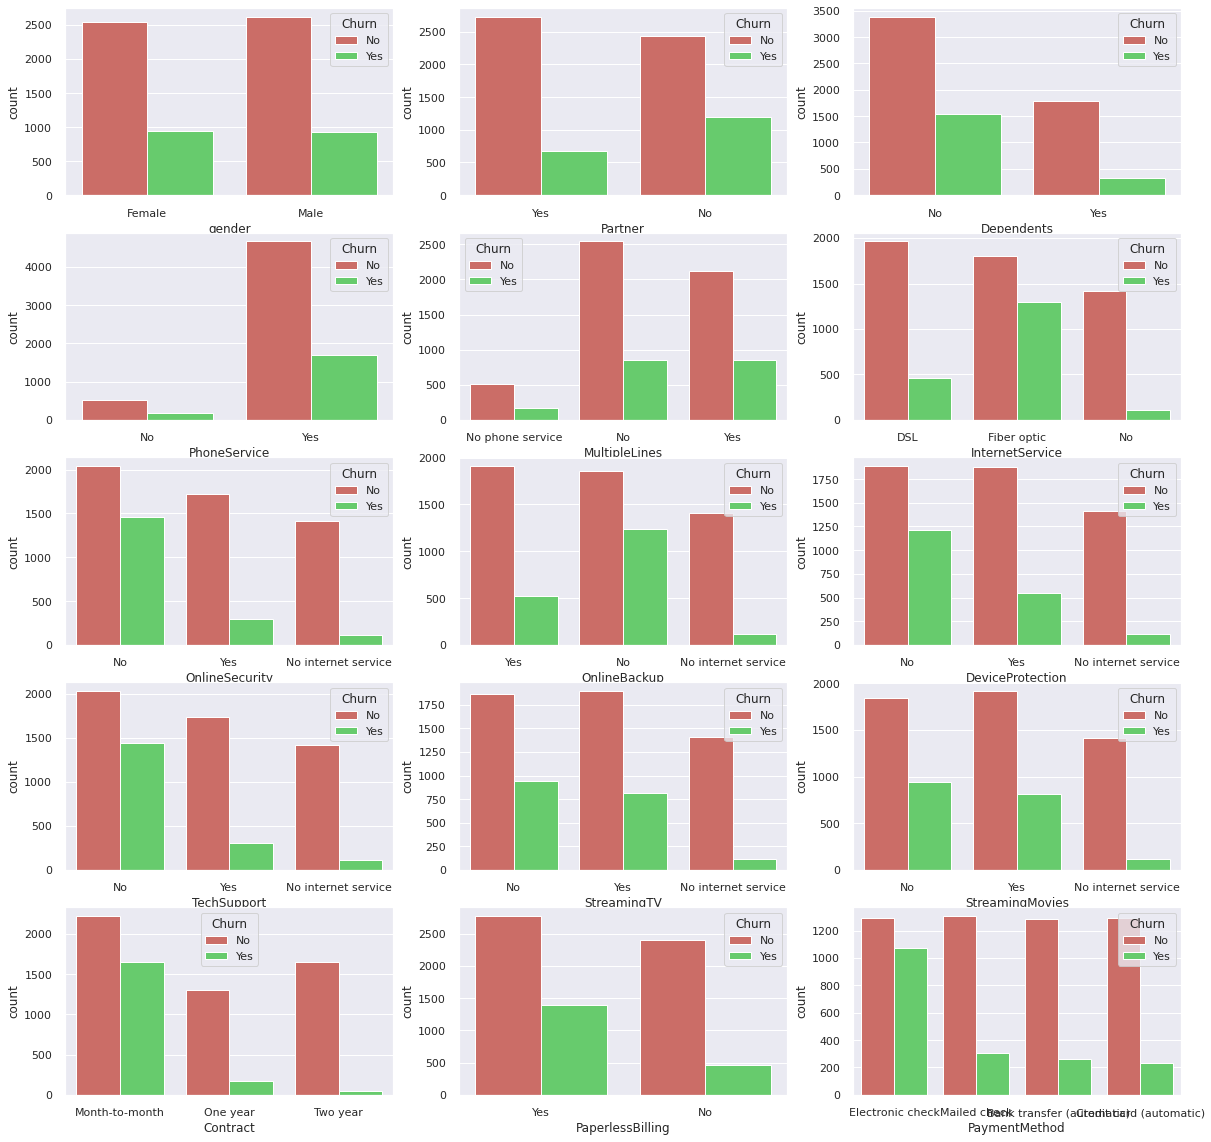

In [43]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15 ]

for coluna in range(len(categoricas)):
    sns.countplot(x = categoricas[coluna],
                  hue = "Churn",
                  data = df,
                  ax = ax[coluna])

Podemos obter algumas informações referente aos plot's acima.

#####**(a)** possibilidade de *feature* com *bias*

Algumas *features* e alguns problemas de negócios poderam sofrer com algum tipo de *bias*, viés nos dados. Poderá gerar algum prejuízo relevante ao modelo. Notamos que a *feature* `gender` possui a informação do gênero `Female` e `Male`. Seria prudente verificar como está a contagem de cada grupo nesse atributo, com a finalidade de não incorrer em um *enviesamento* por gênero.

Podemos notar que esse atributo `gender` está com as classes equilibradas e não incorreríamos em viés em tal atributo.

gender
Female    3488
Male      3555
dtype: int64


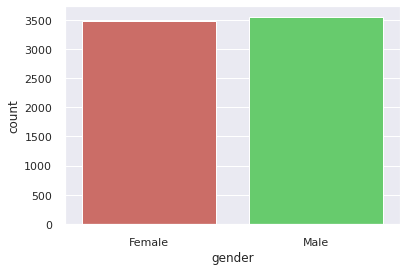

In [44]:
print(df.groupby('gender').size())
sns.countplot(df.gender);

#####**(b)** observações

**(i)** Notamos que para a *feature* `InternetService`, os que possuíam `Fiber optic` possuem mais apontamento para `churn`.

**(ii)** Algumas *features* possuem como 3 valores de representação, exemplo `OnlineBackup`, possui como atributo `['Yes', 'No', 'No internet service']` e se considerar que os `No` são a mesma informação, você poderá unificar essa informaçõa. No entanto, não farei esse tratamento e manterei preservado os dados do dataSet.

In [45]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

####  3.1.5 Preditores Numéricos

Para as *features* numéricas, também faremos uma exploração tanto (a) visual como (b) tabular!!

In [46]:
 df_graph.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [47]:
# recupero uma lista de colunas do tipo numéricas.
numericas = [coluna for coluna in df_graph.select_dtypes(['int64', 'float64']).columns.tolist()]
df_graph[numericas]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


#####  3.1.5.1 Plots dos Preditores Numéricos

Histrogramas é uma boa opção para visualizar variáveis quantitativas, buscamos entender a distribuição de nossas características numéricas em relação ao *Churn* através de uma distribuição de frequência.

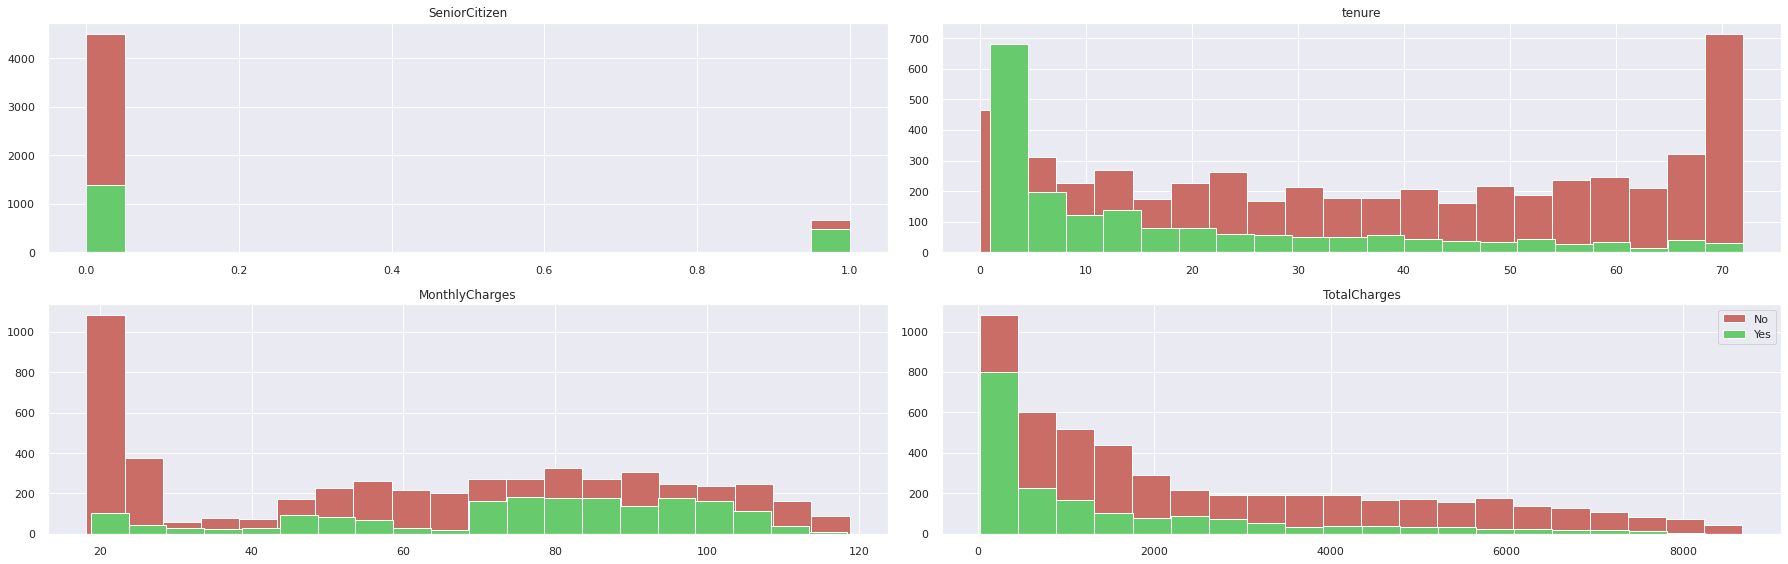

In [48]:
fig, ax =  plt.subplots(2, 2, figsize=(25,8))
df[df.Churn == 'No'][numericas].hist(bins= 20, color= "#CB6D67", ax= ax, label= "No")
df[df.Churn == 'Yes'][numericas].hist(bins= 20, color= "#67CB6D", ax= ax, label = "Yes")
plt.legend()
plt.tight_layout()

Podemos obter algumas informações referente aos plot's acima.

#####**(a)** observações

**(i)** na *feature* `Tenure` ("*cliente desde*") os que deixam a empresa (Churn = sim) tendem a ser clientes relativamente novos.

**(ii)** os clientes que saem tendem a pagar taxas mensais mais altas do que os que permanecem, conforme podemos verificar na *feature* `MonthlyCharges`.

**(iii)** a *feature* `SeniorCitizen` apesar de estar representado como numérica, há sério indício de representar uma informação categórica.

In [49]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [50]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

#####  3.1.5.2 Tabulação dos Preditores Numéricos

Tabulando as variáveis numéricas podemos responder agumas perguntas

In [51]:
numericas

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

**1.** Qual o gasto médio mensal `MonthlyCharges` e o total `TotalCharges` de pessoas que deixaram a empresa (`Yes`) e dos que continuam clientes (`No`)?

In [52]:
df.groupby(['Churn'])['MonthlyCharges', 'TotalCharges'].agg([np.mean])

,MonthlyCharges,TotalCharges
,mean,mean
Churn,,
No,61.265124,2555.344141
Yes,74.441332,1531.796094


**2.** Qual o gasto tempo médio que de um cliente que deixou a empresa (`Yes`) e de um cliente que ainda é ativo(`No`)?

In [53]:
df.groupby(['Churn'])['tenure'].agg([np.mean])

,mean
Churn,
No,37.569965
Yes,17.979133


##### 3.1.5.3 Distribuição Dados - skw/Kurt

Verificando a Distribuição dos elementos dentro de cada variável - Simetria da distribuição.

Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [54]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

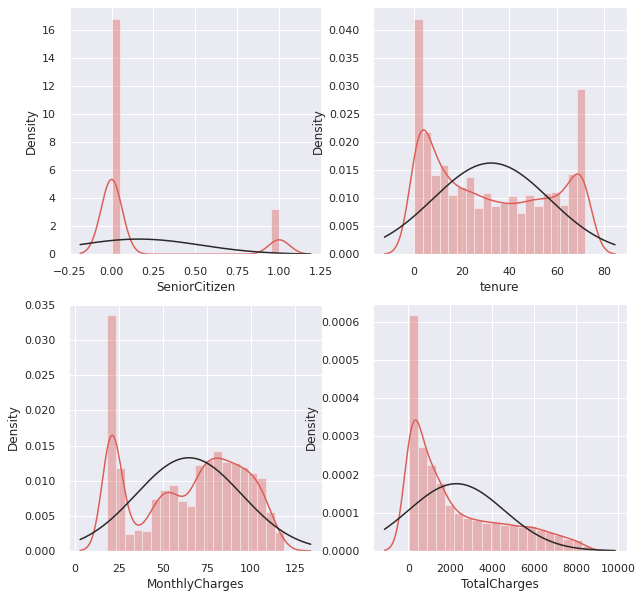

In [55]:
from scipy import stats

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax = [ax1, ax2, ax3, ax4]
for coluna in range(len(numericas)):
  sns.distplot(df[numericas[coluna]], bins=20, hist=True, ax=ax[coluna],fit = stats.norm)

Os Density Plots são outra forma de visualizar a distribuição dos dados para cada atributo. O plot é como uma espécie de histograma abstrato com uma curva suave através do topo dos bins de um histograma. Pode ser mais fácil identificar a distribuição dos dados usando um density plot.

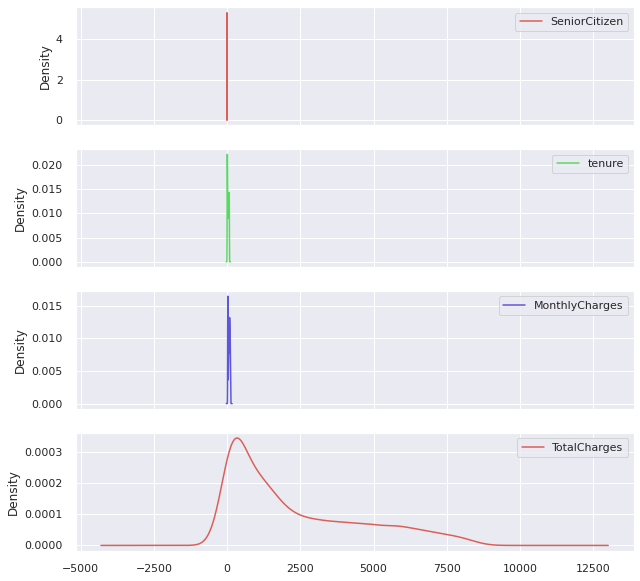

In [56]:
plt.rcParams["figure.figsize"] = (10,10)
df[numericas].plot(kind= 'density', subplots = True);

##### 3.1.5.4 Identificando *outlier's*
Com os boxplots também podemos revisar a distribuição dos dados para cada atributo. A linha no centro de cada *box* é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima o quartil 75%. O boxplot ajuda a ter uma ideia da dispersão dos dados e os possíveis outliers.


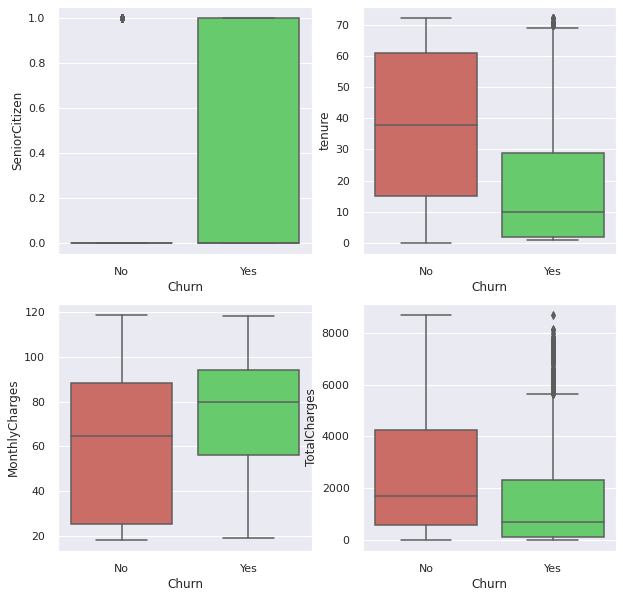

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax = [ax1, ax2, ax3, ax4]

for coluna in range(len(numericas)):
    sns.boxplot(x = 'Churn', y = numericas[coluna], data=df, ax=ax[coluna])

Nesta fase de exploração dos dados vemos que:


1.   Há necessidade de imputar os dados faltantes. Considerando a quantidade ser baixa, apenas 1 feature e com 11 informações faltantes, utilizaremos a média como método.
2.   Existe uma predominância nos dados de *feature* categórica, que enseja no uso de técnicas de *dummie's*
1.   Como usaremos *dummies* nos atributos categóricos, teremos que padronizar esses últimos, colocando todas as *features* em uma mesma escala.
2.   Poderíamos ter feito (a) correlações, (b) re-shape dos dados, (c) alterado variáveis categóricas para apenas binária... enfim, é muito vasto a fase de exploração. Para nosso propósito acredito já ser suficiente.

Iniciaremos a fase de preparar os dados para apresentá-los ao modelo preditivo.





## **4. Pré-Processamento dos Dados**
#### Preparando os Dados para Machine Learning
Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando. É muito provável que você tenha que realizar tarefas de **pré-processamento** nos dados. Esse é um passo extremamente necessário dentro do processo.

O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas, é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

 **Testar é o lado divertido de Ciência de dados!!**

DICA:esta atividade haverá
* (i)transformações de variáveis,
* (ii)feature selections,
* (iii) normalização e padronização,
* (iv)Redução dimensionalidade,
* (v)amostragem

### 4.1 Transformação de Variáveis/Atributos

Dicas:

ALTERAR NOMES DE COLUNAS:
   * (a) crio uma lista com nomes,
   * (b) aplico usando o atributo .columns, atribuindo a lista de nomes

ALTERANDO INDICES: 
* dataSet.set_index('Coluna', (se data)inplace = True)

INCLUINDO NOVA COLUNA:
* (a) dataSet[novacoluna]= dataSet[coluna].map(lambda x: função)
* (b) dataSet[novacoluna] = dataSet.ColunaExistente.map(funçãoqueCriou)

In [58]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 4.1.1 Excluindo atributo sem relevancia

A *feature* `customerID` como ja mencionado anteriormente (item 3.1) não possui valor preditivo.

Boa prática é sempre manter intacto o dataSet original e realizar uma cópia para realizar os pré-processamento.

In [59]:
df_proc = df.copy()
# df_proc

In [60]:
df_proc.drop("customerID", axis= 1, inplace= True)
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 4.2 Feature Engineer 


#### 4.2.1 Imputação Missing 

Método 1 de imputação para variáveis numéricas -> substituir pela mediana: 
(a) imp_num = SimpleImputer(missing_values=np.nan, strategy='median', add_indicator=True)
(b) imputer.fit_transform

Método 2 -> fillna()

In [61]:
df_proc.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Conforme mencionado o atributo `TotalCharges` possui 11 valores faltantes. Iremos usar a abordagem de **preencher esses valores com a média da feature**.

In [62]:
TotalCharges_media = df_proc.TotalCharges.median()
print('A média do atibuto é:', TotalCharges_media)

A média do atibuto é: 1397.475


In [63]:
df_proc['TotalCharges'].fillna(TotalCharges_media, inplace= True)
df_proc.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 4.2.2 Dummies 
Técnica de entregar a var_Categóricas, formato numérico sem perder representação da informação

Para var_Categóricas binárias é indicado
Forma 1  -> le = LabelEncoder() -> na mesma *feature* indica um sequencial numérico para as categórias

Já para var_Categóricas multicasses, podemos usar:

Forma 2 -> ohe = OneHotEncoder(handle_unknown='error', drop='first')

Forma 3 -> pd.get_dummies(df, columns = [''])

As formas 2 e 3 cria uma espécie de *binário* para as multiclasses, adicionando colunas ao dataSet. Importante mencionar que ao adicionar colunas temos que ter cuidado com a dimensionalidade dos dados.

Iremos aplicar duas forma de *dummizar* os dados. Separaremos as *features* categoricas binárias (possuem 2 valores únicos) das *features* categóricas multicasses.

In [64]:
var_cat_bin = df_proc.nunique()[df_proc.nunique()== 2].keys().tolist()
var_cat_mul = [coluna for coluna in df_proc.columns.tolist() if coluna not in var_cat_bin + numericas]

##### 4.2.2.1 Dummies Binárias 

In [65]:
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
le = LabelEncoder()
for coluna in var_cat_bin:
  df_proc[coluna] = le.fit_transform(df_proc[coluna])

df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


##### 4.2.2.2 Dummies Multiclasse 

In [67]:
df_proc = pd.get_dummies(df_proc, columns= var_cat_mul)
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Antes de proseeguir com as atividades de *feature scaling*, como estamos construindo um **classificador** e nossa variável alvo é uma classe, iremos agora separar o dataSet para obter o **X, variáveis preditoras** e o **y variável a ser predita**, além de ser como os algortimos de ML do Sckit esperam receber os dados!!!

In [68]:
X = df_proc.drop(columns= 'Churn', axis= 1)
y = df_proc['Churn']

### 4.3 Feature Scaling


técnicas: from sklearn.preprocessing import

(i) StandardScaler
Útil para algorítimos que pressupõem uma distribuição gaussiana nas variáveis de entrada e funcionam melhor com dados reescalonados, como regressão linear, regressão logística e análise discriminante linear. Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1.

In [69]:
colunas = X.columns
X_scale = X.values
scaler= StandardScaler()
X_scale = scaler.fit_transform(X_scale)

In [70]:
print('Antes da Padronização')
X.head()

Antes da Padronização


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [71]:
X = pd.DataFrame(X_scale, columns= colunas)
print('Depois da Padronização')
X.head()

Depois da Padronização


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.829798,-1.160323,-0.994242,-0.963330,...,1.236489,-0.525927,-0.79607,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-1.205113,-0.259629,-0.173244,1.038066,...,1.236489,-0.525927,-0.79607,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,0.829798,-0.362660,-0.959674,1.038066,...,1.236489,-0.525927,-0.79607,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-1.205113,-0.746535,-0.194766,-0.963330,...,1.236489,-0.525927,-0.79607,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,0.829798,0.197365,-0.940470,1.038066,...,1.236489,-0.525927,-0.79607,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807


A informação é a mesma apenas em escala diferente!!!

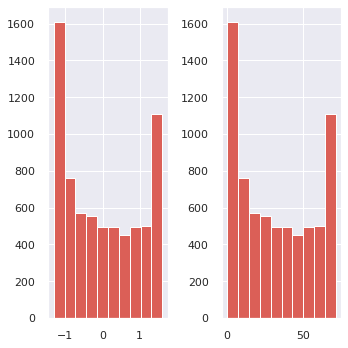

In [72]:
plt.rcParams['figure.figsize']= (5,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows= 1)

X.tenure.hist(ax= ax1)
df.tenure.hist(ax= ax2)
plt.tight_layout()

## Alguns comentários:

Nos projetos que venho trabalhando, gosto de usar uma sequência didática dos *steps* e abordagens para cada contexto/problema a ser resolvido. Não existe uma receita específica de como fazer **Ciência de dados**... existe (a) técnicas e (b) boas práticas a serem utilizadas.

Quero começar a trazer uma abordagem de **Pipeline**, que são fluxos de trabalhos que podemos acrecentar nos projetos de algoritmos de *Machine Learning*.

Os passos realizados na fase de **pré-processamento**, na maioria dos casos, são fluxos de trabalho contínuos. Ou seja, tudo que fizer nos dados que treinamos e validamos o modelo, quando o modelo estiver em **produção** deveremos aplicar esse mesmo fluxo de trabalho de pré=processamento. Ferramentas como [*Pipeline*](https://scikit-learn.org/stable/modules/compose.html#combining-estimators) auxiliam nesses fluxo de trabalhos de forma performática.

Materei a sequência didática nesse jupyter (cada output de uma célula é um input para proxima), no entanto abaixo seria uma abordagem de fazer os passos acima em apenas um fluxo de trabalho!!





In [73]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # indicamos o fluxo de trabalho que desejamos fazer
# prepocessamento = ColumnTransformer(transformers= [('numericas', fillna(TotalCharges_media), numericas),
#                                                    ('var_cat_bin',LabelEncoder, var_cat_mul),
#                                                    ('var_cat_mul', pd.get_dummies, var_cat_mul),
#                                                    ('scaler', StandardScaler, numericas)])

# # usamos esse fluxo para indicar ao modelo.
# fluxo_trabalho = Pipeline(steps= [('prepocessamento', prepocessamento),
#                                   ('algoritmo', classes_algoritmos)])

### 4.4 Split dados

Dividir os dados em **Treino** e **Teste** é uma boa prática para garantir um modelo mais generalista possível.

técnicas: sklearn.model_selection import

(i) train_test_split-estático



#### 4.4.1 Estático
O split de dados é uma boa prática. Para realizar há necessidade de realizar a a segregação da variável Target do dataSet. Já realizamos esse procedimento anteriormente (item 3.1.2) deste Colab. 

O parâmetro stratify=True, garante que os conjuntos de Treino e Teste tenham a mesma quantidade de classes proporcionalmente e o parâmetro shuffle=T, embaralha o dataSet, indicando aleatoriedade.

In [74]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, shuffle=True)

In [75]:
print('tamanho total dos dados são {}, para treino temos {} e teste são {}'.format(df_proc.shape[0], len(X_treino), len(X_teste)))

tamanho total dos dados são 7043, para treino temos 5282 e teste são 1761


### 4.5 Feature Engineer



#### 4.5.1.Balanceamento de classes
São técnicas para manter um "certo balancemanto" entre as classes, pois se temos classe majoritária o modelo de *ML*, possivelmente aprenderá mais sobre ela, logo temos um problema -> **modelo sem generalização**, devemos evitar!!.

Podemos utilizar:

undersampling: remove-se alguns registros da classe majoritária, preservando as características da classe minoritária, ideal para quando se há um grande volume de dados. Este método pode acarretar em um desempenho inferior na hora de fazer predições da classe majoritária, pois reduz o tamanho do dataset.

**ATENÇÃO 1**: o ideal é sempre aplicar as técnicas depois de realizar o split dos dados (treino e teste). Se aplicar o balancemento antes, o padrão usado para aplicar o oversampling/undersampling será o mesmo nos dados de treino e de teste, com isso a avaliação do modelo fica comprometida.

**ATENÇÃO 2**: você ao tomar decisão de balancear os dados, diretamente está alterando seu conjunto de dados. Ou seja, saiba **o que** está fazendo e **para que** está fazendo!!!!

Da biblioteca imblearn é possível aplicar técnicas de balanceamento de dados. Usaremos além do Undersampling que remove amostras da classe majoritário, preservando assim a classe minoritária

[saber mais sobre técnicas de balanceamento e quando usar](https://github.com/angeloBuso/algoritmos_ML/blob/main/%5BTemplate_Classificador_Buso%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb)

In [76]:
# a. instanciar as classes dos métodos pretendidos
rus = RandomUnderSampler()

# b. usam método fit_sample() para usar a técnica
X_treino_rus, y_treino_rus = rus.fit_resample(X_treino, y_treino)

In [77]:
print("\Antes do balanceamento:", X_treino.shape[0])
print("\Depois de balancear:", X_treino_rus.shape[0])

\Antes do balanceamento: 5282
\Depois de balancear: 2804


**Atenção** -> ao aplicar essa técnica de balancear as classes, **retiramos** dos nossos dados de teste algumas informações. Torno a falar, de uma forma indireta ou direta **estamos impactando no modelo preditivo**. Aqui optei por usar esta técnica no entando cada contexto irá pedir abordagens diferentes!

= output: dados pré-processados e splitados para iniciar a construção do modelo de ML

## **5. Seleção de Algoritmos**

Dado o problema de negócio, a seleção do algoritmo se dá pelo modelo que apresentar melhor performance, sendo assim temos que treinar o algoritmo, testar e validar. Podemos utilizar (i) individualizar/automatizar modelos de algoritmos de *ML* ou (ii) usar algoritmos tipo ensemble.

O intuito desse projeto é **(a)** usar a técnica de **Validação Cruzada** que em resumo visa reduzir possibilidades de *overfitting* do modelo, bem como treinar um conjunto de modelos e verificar a acurácia de cada um, na possibilidade de escolher o que apresentou melhor performance e **(b)** usar uma técnica de otimização dos *hypermarâmetros*, para verificar se há melhoria na performance.




### 5.1 Algoritmos de Classificação

Não temos como saber qual algoritmo vai funcionar melhor na construção do modelo, sendo assim temos que ajustar (*fit*) o/os algoritmo(s) com nosso dataSet. O ideal é testar alguns algoritmos e então escolher o que fornece melhor nível de precisão. Vamos testar um conjunto de algoritmos de classificação, nas mesmas condições.

A **validação cruzada** (*cross validation*) é usada para testar a generalização do modelo. Como treinamos qualquer modelo no conjunto de treinamento, ele tende a se **ajustar demais** na maioria das vezes e para evitar essa situação, usamos técnicas de regularização.

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância em comparação com a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de *k-folds* (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão. O resultado é normalmente mais confiável e oferece maior acurácia ao modelo.

A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

#### Forma automatizada 1
Com **Cross Validation** realizamos o *fit* -> *predict* -> *score* do modelo.

In [78]:
# (a) instancia as classes dos algoritmos

algoritmos = [
              RandomForestClassifier(),
              DecisionTreeClassifier(),
              SGDClassifier(),
              SVC(),
              LogisticRegression(),
              XGBClassifier(),
              LGBMClassifier()
              ]

In [79]:
# (b) estrutura de repetição 
score_modelo = []
for classificador in algoritmos:
    # print('Rodando algoritmo:', classificador.__class__.__name__)
    # Mensurar métrica de performance 'scorimg' usando validação cruzada
    score = cross_val_score(classificador,
                            X_treino_rus,
                            y_treino_rus,
                            scoring='recall')
    score_modelo.append(
        {'Estimator':classificador.__class__.__name__, 'Score médio':score.mean()}
        )
    # print('Recall:', round(score.mean(),4))

pd.DataFrame(score_modelo)

,Estimator,Score médio
0,RandomForestClassifier,0.768185
1,DecisionTreeClassifier,0.678996
2,SGDClassifier,0.655539
3,SVC,0.808139
4,LogisticRegression,0.799586
5,XGBClassifier,0.804611
6,LGBMClassifier,0.785308


Uma das vantagens de usar a Validação Cruzada, é comparar diversos algoritmos de *ML* de uma só vez.

Verificamos que, dado as características do problema de negócios, bem como os dados e as explorações/pré-processamentos que realizamos, o algoritmo XGBoost, da família dos tipos [*ensemble*](https://xgboost.readthedocs.io/en/stable/parameter.html), **XGBClassifier** mostrou uma das melhores métrica de *recall*, que significa a capacidade que o modelo possui em prever corretamenta a classe positiva (Churn = *yes*).

Notamos que a *Regressão Logística* apresentou um *recall* próximo do algoritmo XGBoost, entretanto como um dos objetivos desse projeto é o uso de uma **otimização de hyperparâmetros** escolheremos o XGBoost para realizar o **tunning** do melhor modelo.

Apenas para verificar sem a validação cruzada como seria a acurácia do modelo usando algoritmo XGBoost.

In [80]:
from sklearn.metrics import recall_score
modelo = XGBClassifier()
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
print('recall de:', recall_score(y_teste, y_pred))

recall de: 0.5610278372591007


### 5.2 Otimização Modelo

*Tuning modelo* -> do melhor modelo ajusta-se os *hyperparâmetros* (conjuto de parâmetros do modelo)

Todos os algoritmos de *Machine Learning* são parametrizados, o que significa que podemos ajustar a performance do modelo preditivo, através do *tunning* (ajuste fino) dos *hyperparâmetros*. Nosso trabalho é encontrar a melhor combinação entre os esses *hyperparâmetros* em cada algoritmo de *Machine Learning*.

Chamamos esse processo de **Otimização de Hyperparâmetros**. O scikit-learn oferece dois métodos para otimização automática dos parâmetros: **(1)** Grid Search Parameter Tuning e **(2)** Random Search Parameter Tuning. 


#### 5.2.1 Grid Search Parameter Tuning
Este método realiza metodicamente combinações entre todos os parâmetros do algoritmo, criando um grid. Vamos experimentar este método utilizando no modelo em que usamos o XGBoost e iremos *tunnar* os seguintes hyperparâmetros:
`learning_rate`
`n_estimators`
`max_depth`
`min_child_weight`
`gamma`

O que faremos: cada hyperparâmetro do XGBoost pode ser consultado na [documentação](https://xgboost.readthedocs.io/en/stable/parameter.html#parameters-for-tree-booster) do algoritmo. Iremos passar um `dicionário nome:valor`  com uma sequência de valores para cada hyperparâmetro ao **otimizador** `GridSearch`, que testará qual valor apresenta melhor ajuste aos dados.

Boa prática: realizar de forma escalonada cada hyperparâmetro!!

In [81]:
score_modelo[5]

{'Estimator': 'XGBClassifier', 'Score médio': 0.8046110828673105}

##### (a) `n_estimators`

In [82]:
# intanciando a classe do algortimo
xgb = XGBClassifier(learning_rate= 0.1)

# dicionário com o parametro:valor a ser testado
grid_parametros = {
    'n_estimators':range(0,1000,50),
    }

# instanciando a quandidade de *folds* a ser usado na validação cruzada 
kfold = StratifiedKFold(n_splits= 10, shuffle= True)

# identificar melhor valor do hyperparâmetro acima
grid_search = GridSearchCV(xgb,
                           grid_parametros,
                           scoring = 'recall',
                           n_jobs = -1,
                           cv = kfold)

# fit do modelo com melhor parametro
grid_resultado = grid_search.fit(X_treino_rus, y_treino_rus)

# print do melhor valor
print("Melhor Recall foi de {}, usando {}".format(grid_resultado.best_score_,
                                                  grid_resultado.best_params_))

Melhor Recall foi de 0.8045947315096251, usando {'n_estimators': 50}


##### (b) `max_depth` e `min_child_weight`

In [83]:
# intanciando a classe do algortimo
xgb = XGBClassifier(learning_rate= 0.1,
                    n_estimators= 50)

# dicionário com o parametro:valor a ser testado
grid_parametros = {
    'max_depth':range(1,8,1),
    'min_child_weight':range(1,5,1)
    }

# instanciando a quandidade de *folds* a ser usado na validação cruzada 
kfold = StratifiedKFold(n_splits= 10, shuffle= True)

# identificar melhor valor do hyperparâmetro acima
grid_search = GridSearchCV(xgb,
                           grid_parametros,
                           scoring = 'recall',
                           n_jobs = -1,
                           cv = kfold)

# fit do modelo com melhor parametro
grid_resultado = grid_search.fit(X_treino_rus, y_treino_rus)

# print do melhor valor
print("Melhor Recall foi de {}, usando {}".format(grid_resultado.best_score_,
                                                  grid_resultado.best_params_))

Melhor Recall foi de 0.8274214792299899, usando {'max_depth': 1, 'min_child_weight': 1}


##### (c) `gamma`


In [84]:
# intanciando a classe do algortimo
xgb = XGBClassifier(learning_rate= 0.1,
                    n_estimators= 50,
                    max_depth= 1,
                    min_child_weight= 1)

# dicionário com o parametro:valor a ser testado
grid_parametros = {'gamma':[i/10.0 for i in range(0,5)]}

# instanciando a quandidade de *folds* a ser usado na validação cruzada 
kfold = StratifiedKFold(n_splits= 10, shuffle= True)

# identificar melhor valor do hyperparâmetro acima
grid_search = GridSearchCV(xgb,
                           grid_parametros,
                           scoring = 'recall',
                           n_jobs = -1,
                           cv = kfold)

# fit do modelo com melhor parametro
grid_resultado = grid_search.fit(X_treino_rus, y_treino_rus)

# print do melhor valor
print("Melhor Recall foi de {}, usando {}".format(grid_resultado.best_score_,
                                                  grid_resultado.best_params_))

Melhor Recall foi de 0.8259473150962512, usando {'gamma': 0.0}


##### (d) `learning_rate`

In [85]:
# intanciando a classe do algortimo
xgb = XGBClassifier(n_estimators= 50,
                    max_depth= 1,
                    min_child_weight= 1,
                    gamma= 0.0)

# dicionário com o parametro:valor a ser testado
grid_parametros = {'learning_rate':[0.001, 0.01, 0.1, 1]}

# instanciando a quandidade de *folds* a ser usado na validação cruzada 
kfold = StratifiedKFold(n_splits= 10, shuffle= True)

# identificar melhor valor do hyperparâmetro acima
grid_search = GridSearchCV(xgb,
                           grid_parametros,
                           scoring = 'recall',
                           n_jobs = -1,
                           cv = kfold)

# fit do modelo com melhor parametro
grid_resultado = grid_search.fit(X_treino_rus, y_treino_rus)

# print do melhor valor
print("Melhor Recall foi de {}, usando {}".format(grid_resultado.best_score_,
                                                  grid_resultado.best_params_))

Melhor Recall foi de 0.8880141843971631, usando {'learning_rate': 0.001}


Podemos constatar que no cerne de *Machine Learning* a etapa de **otimização** é onde podemos conseguir os melhores resultados. Nesta etapa são algoritmos de *Machine Learning* **iteragindo** com modelos de *Machine Learning*.

Podemos afirmar que um taxa de aprendizado menor, conseguimos melhorar o desempenho do modelo XGBoost, considerando, neste jupyter e neste contexto apenas **recall** como métrica de performance do modelo.

Tínhamos uma taxa de *Recall* de 0,8046 e ao otimizar o modelo atingimos 0,888. Um ganho de performance... que saberemos ao aplicar aos dados de teste!!

### 5.3 Modelo Final

Partiremos para etapa final... (i) treinaremos o modelo, usando algoritmo XGBoost (com melhores valores de hyperparametros) nos **dados de treino processados** e (ii) verificaremos o desempenho final em nos **dados de teste**, é o primeiro contato do modelo com esse sub-conjunto que havíamos preservado no item 4.4.

              precision    recall  f1-score   support

           0       0.93      0.57      0.70      1294
           1       0.42      0.88      0.57       467

    accuracy                           0.65      1761
   macro avg       0.68      0.72      0.64      1761
weighted avg       0.79      0.65      0.67      1761



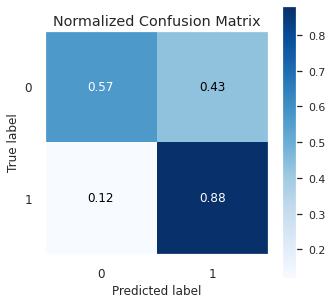

In [86]:
# modelo final
xgb = XGBClassifier(learning_rate= 0.001,
                    n_estimators= 50,
                    max_depth= 1,
                    min_child_weight= 1,
                    gamma= 0.0)

# fit do modelo dados de TREINO
xgb.fit(X_treino_rus, y_treino_rus)

# predict modelo dados de TESTE
y_previsao = xgb.predict(X_teste)

# acurácia do modelo
print(classification_report(y_teste, y_previsao))
plot_confusion_matrix(y_teste, y_previsao, normalize= True)
plt.show()

De fato o modelo final manteve sua generalização nos dados de **testes**!!

In [87]:
print('recall de:', recall_score(y_teste, y_previsao))

recall de: 0.8779443254817987


A *confusion matrix* permite identificar quais dos 2 tipos de erros o modelo incorreu.

Erros do **tipo 1** são os conhecidos como **falso Positivo (FP)**, para nosso caso esse erro é quando o modelo preveu que haveria uma evansão (*Churn*) no entanto cliente permaneceu na empresa, ou seja, para esse erro a empresa poderia ofertar um desconto ou uma oferta a um cliente que não sairia da empresa, aqui esse cliente fica super contente!!!  😄😄😄.

Erros do tipo 2 são os falso Negativo (FN), ou seja, foi previsto que o cliente **não sairia** da empresa no entanto o cliente saiu!! Esse cara poderia até ter ficado se fosse ofertado para ele um desconto no seu 5g!!!!

## **6. Salvando o resultado do seu trabalho**

Podemos salvar esse modelo, uam vez que entendemos estar pronto para usá-lo sem a necessidade de toda vez ter que retreiná-lo.

In [ ]:
# # Salvando o modelo
# import pickle
# arquivo = 'path/modelo_classificador_final.sav'
# pickle.dump(modelo, open(arquivo, 'wb'))
# print("Modelo salvo!")

  ## **Conclusões**

O uso da **cross validation** permite redizir riscos de *overfitting* no modelo, ao passo que separa os dados de treino em mais amostras. Além de permitir comparar mais de um algortimo de *ML*, dando celeridade ao processo.

A otimização dos *hyperparâmetros* usando outros algoritmos de *ML* entregou ao modelo um aumento no *Recall* de 0,08 (de 0,80 para 0,88) ganho considerável de performance, levando em consideração que apenas ajustamos os *hyperparâmetros*. 

Manteve ainda uma boa generalização nos dados de **teste**. Mantendo um *Recal* de 0,87.

Ainda há espaço para se tentar outras técnicas de balanceamento de dados, *feature engineering*, *feature selection*, enfim, podemos trabalhar os dados.

Encerro por aqui!! Espero que tenho gostado!!

Até o próximo projeto!!